OEL A2 (GIVEN WITH A1)

Roll.NO:23-AI-40

Question #1
1. Student Performance Predictor
Create a Python application that predicts whether a student will pass or fail based on study
hours, attendance, and assignment scores.
Dataset: Student Performance Data Set (UCI)  
• Integration:
o Apply data preprocessing to handle missing data and scaling.
o Use Linear Regression to predict final marks and Logistic Regression or
Decision Tree to classify pass/fail.
o Compare models using accuracy, precision, and recall.





In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,mean_absolute_error,mean_squared_error,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
df_1=pd.read_csv('student-mat.csv',delimiter=';')
df_2=pd.read_csv('student-por.csv',delimiter=';')


In [3]:
df_1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [4]:
df_2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [5]:
df_1.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [6]:

df_2.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [7]:
print('WE CHOOSE df_2 as main dataset as it has more data')

WE CHOOSE df_2 as main dataset as it has more data


<Axes: >

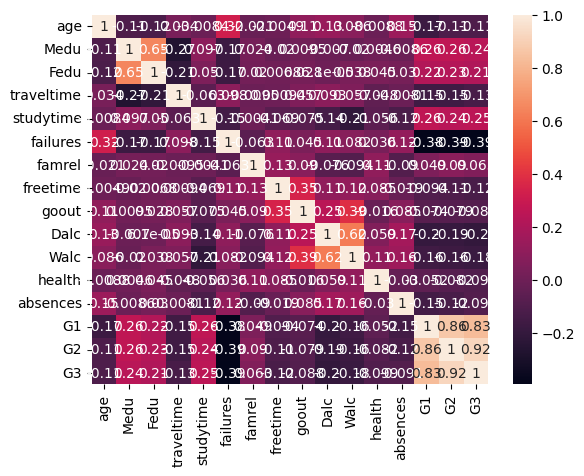

In [8]:
sns.heatmap(df_2.corr(numeric_only=True),annot=True)

In [9]:
corr=df_2.corr(numeric_only=True)
top_features=corr['G3'].sort_values(ascending=False)[1:6].index.tolist()#SELECT TOP FEATURES AS THEY MOSTLY AFFECT ANSWER
top_features

['G2', 'G1', 'studytime', 'Medu', 'Fedu']

In [10]:
X=df_2[top_features]
Y=df_2['G3']

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [12]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [13]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)

LinearRegression()

In [14]:
Y_pred=lin_reg.predict(X_test)
Y_pred

array([18.57534444, 11.28425765, 18.75987626, 11.09866783, 11.80258588,
       16.73466796, 17.64273007,  9.40722845, 10.26521052, 10.54995741,
       18.93279677, 12.30525913, 12.4878641 ,  9.567263  , 12.04799519,
       13.41939296, 11.46773146,  7.30738786, 15.77861433, 14.48748962,
       15.31017698, 13.69038504, 13.60392478, 12.47495063, 15.44674477,
       13.12387613,  8.3518286 , 11.42085294, 11.54450727, 15.55558628,
       16.55013614, 13.31055145,  8.04361495,  7.16113562, 18.52629491,
       15.52031906, 14.19197278, 14.84795431, 13.30840794, 11.30878242,
       13.58048552, 10.35058528,  8.07890967, 11.59160245, 13.40970851,
       13.38518375, 18.32215085, 11.28319965, 12.22869998, 11.60622611,
       11.33439269, 11.07522857, 14.5268272 ,  9.99527645, 11.09866783,
       18.06407224,  9.02633686, 11.38450022, 11.1988829 ,  9.50530001,
        9.11171161, 11.33330718, 16.73466796, 12.24245479, 15.26006944,
       15.53106152, 10.2172465 ,  8.7790007 ,  9.55540754,  9.26

In [15]:
print("MAE:",mean_absolute_error(Y_test,Y_pred))
print("MSE:",mean_squared_error(Y_test,Y_pred))
print("RMSE:",np.sqrt(mean_squared_error(Y_test,Y_pred)))
print('Accuracy:',lin_reg.score(X_test,Y_test))

MAE: 0.7422502174988896
MSE: 1.3897169200968549
RMSE: 1.1788625535221886
Accuracy: 0.8574900126839345


In [16]:
df_2['PassFail']=pd.qcut(df_2['G3'],q=2,labels=[0,1])#Categorizing pass and fail using G3
y_pass=df_2['PassFail']

In [17]:
X_class=df_2[top_features]
y_class=y_pass

In [18]:
X_train_C,X_test_C,Y_train_C,Y_test_C=train_test_split(X_class,y_class,test_size=0.2,random_state=42)

In [19]:
scaler=StandardScaler()
X_train_C=scaler.fit_transform(X_train_C)
X_test_C=scaler.transform(X_test_C)

In [20]:
log_reg=LogisticRegression()
log_reg.fit(X_train_C,Y_train_C)

LogisticRegression()

In [21]:
y_pred_c=log_reg.predict(X_test_C)
y_pred_c

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0])

In [22]:
print("Accuracy:", accuracy_score(Y_test_C, y_pred_c))
print("Precission:",precision_score(Y_test_C, y_pred_c))
print("Confusion Matrix:\n",confusion_matrix(Y_test_C,y_pred_c))
print("Classification Report:\n",classification_report(Y_test_C,y_pred_c))

Accuracy: 0.9076923076923077
Precission: 0.8571428571428571
Confusion Matrix:
 [[64  9]
 [ 3 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.91        73
           1       0.86      0.95      0.90        57

    accuracy                           0.91       130
   macro avg       0.91      0.91      0.91       130
weighted avg       0.91      0.91      0.91       130



In [23]:
print("MAE:",mean_absolute_error(Y_test,Y_pred))
print("MSE:",mean_squared_error(Y_test,Y_pred))
print("RMSE:",np.sqrt(mean_squared_error(Y_test,Y_pred)))
print('Accuracy:',lin_reg.score(X_test,Y_test))

MAE: 0.7422502174988896
MSE: 1.3897169200968549
RMSE: 1.1788625535221886
Accuracy: 0.8574900126839345


In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
DecisionTreeClassifier=DecisionTreeClassifier()
DecisionTreeClassifier.fit(X_train_C,Y_train_C)

DecisionTreeClassifier()

In [26]:
y_pred_c_dt=DecisionTreeClassifier.predict(X_test_C)
y_pred_c_dt

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0])

In [27]:
print('Accuracy with decision:',accuracy_score(Y_test_C,y_pred_c_dt))
print("Precission with decision:",precision_score(Y_test_C, y_pred_c_dt))
print("Confusion Matrixwith decision:\n",confusion_matrix(Y_test_C,y_pred_c_dt))
print("Classification Reportwith decision:\n",classification_report(Y_test_C,y_pred_c_dt))

Accuracy with decision: 0.8846153846153846
Precission with decision: 0.85
Confusion Matrixwith decision:
 [[64  9]
 [ 6 51]]
Classification Reportwith decision:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90        73
           1       0.85      0.89      0.87        57

    accuracy                           0.88       130
   macro avg       0.88      0.89      0.88       130
weighted avg       0.89      0.88      0.88       130



In [28]:
print("Accuracy of log:", accuracy_score(Y_test_C, y_pred_c))
print("Precission of log:",precision_score(Y_test_C, y_pred_c))
print("Confusion Matrix of log:\n",confusion_matrix(Y_test_C,y_pred_c))
print("Classification Report of log:\n",classification_report(Y_test_C,y_pred_c))

Accuracy of log: 0.9076923076923077
Precission of log: 0.8571428571428571
Confusion Matrix of log:
 [[64  9]
 [ 3 54]]
Classification Report of log:
               precision    recall  f1-score   support

           0       0.96      0.88      0.91        73
           1       0.86      0.95      0.90        57

    accuracy                           0.91       130
   macro avg       0.91      0.91      0.91       130
weighted avg       0.91      0.91      0.91       130

